In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
import pickle
from xgboost import plot_tree


In [2]:
# #############################################################################
# Load data
data = pd.read_csv('../../SynData/data/GeneratedLogData.csv')
#data = pd.read_csv('../../RealData/RealData_Small.csv')


In [3]:
# #############################################################################
# Training and Testing Data
X = data[['throughput']]
y = data['CPU']


X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

n = len(X)
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [4]:
# #############################################################################
# Fit XGB regression model
clf = xgb.XGBRegressor()
#clf = GridSearchCV(xgb_model, {'max_depth': [3, 4, 6, 8, 9, 10], 'n_estimators': [100, 110, 200]}, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

#{'eta': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 1}

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [5]:
prediction = clf.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Throuput,Actual,Predicted
0,0.192159,0.584624,0.572641
1,0.808999,5.944009,5.953167
2,0.999016,9.946620,9.935485
3,0.900725,7.650298,7.685101
4,0.960519,8.982353,8.963218
5,0.247954,0.811204,0.846453
6,0.781031,5.494045,5.494673
7,0.076099,0.200028,0.199708
8,0.483013,2.180491,2.155721
9,0.672820,4.011247,4.021700


Text(0, 0.5, 'Predicted Y')

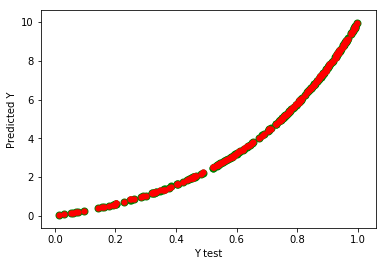

In [6]:
#Plot prediction
plt.scatter(X_test, y_test,  color='green', linewidth=2)
plt.scatter(X_test, prediction, color='red', linewidth=.2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")



#plot_tree(clf) 
#fig = plt.gcf()
#fig.set_size_inches(150, 100)
#plt.show()
#sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
#sns.residplot(X_test.flatten(), y_test, lowess=True, color="g")

MAE: 0.01697074510511799
MSE: 0.0004917843685062071
RMSE: 0.022176211770864002


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


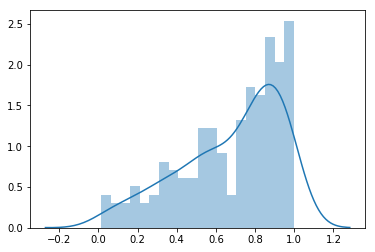

In [7]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
sns.distplot(X_test,bins=20)

In [8]:
# save the model to disk
filename = '../models/XGB_model_poly.sav'
pickle.dump(clf, open(filename, 'wb'))

In [13]:
data = scaler.transform(np.float32([[240]])) 
print(data)

[[0.6944736]]


In [14]:
clf.predict(data)

array([4.302273], dtype=float32)